<a href="https://colab.research.google.com/github/Aldistwn29/Experience_Perusahaan_Quantum/blob/main/Projek_quantum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Load data**

In [ ]:
path_1 = "transaction_data.csv"
path_2 = "purchase_behaviour.csv"

In [ ]:
df_transaction = pd.read_csv(path_1, on_bad_lines="warn")
df_behavior = pd.read_csv(path_2)

In [ ]:
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
df_behavior.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# **Data Cleaning**

# **Data Transaction**

In [ ]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:
df_transaction.shape

(264836, 8)

In [ ]:
df_transaction.shape

(264836, 8)

In [ ]:
df_transaction.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,month,year
0,1970-01-01 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,1,1970
1,1970-01-01 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,1,1970
2,1970-01-01 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1,1970
3,1970-01-01 00:00:00.000043329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,1,1970
4,1970-01-01 00:00:00.000043330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,1,1970
5,1970-01-01 00:00:00.000043604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,1,1970
6,1970-01-01 00:00:00.000043601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,1,1970
7,1970-01-01 00:00:00.000043601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,1,1970
8,1970-01-01 00:00:00.000043332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,1,1970
9,1970-01-01 00:00:00.000043330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,1,1970


In [ ]:
# conversi column date
df_transaction['DATE'] = pd.to_datetime(df_transaction['DATE']).dt.normalize()
df_transaction['DATE'].head()

,DATE
0,1970-01-01
1,1970-01-01
2,1970-01-01
3,1970-01-01
4,1970-01-01


In [ ]:
df_transaction['month'] = df_transaction['DATE'].dt.month
df_transaction['year'] = df_transaction['DATE'].dt.year

In [ ]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
 8   month           264836 non-null  int32         
 9   year            264836 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(5), object(1)
memory usage: 18.2+ MB


In [ ]:
df_transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,1970-01-01 00:00:00.000043464,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,1970-01-01 00:00:00.000043282,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,1970-01-01 00:00:00.000043373,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,1970-01-01 00:00:00.000043464,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,1970-01-01 00:00:00.000043555,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,1970-01-01 00:00:00.000043646,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


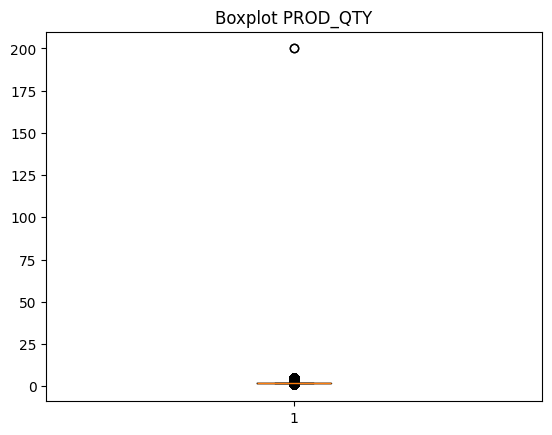

In [ ]:
# visualisasi boxplot cek outlier
plt.boxplot(df_transaction['PROD_QTY'])
plt.title('Boxplot PROD_QTY')
plt.show()

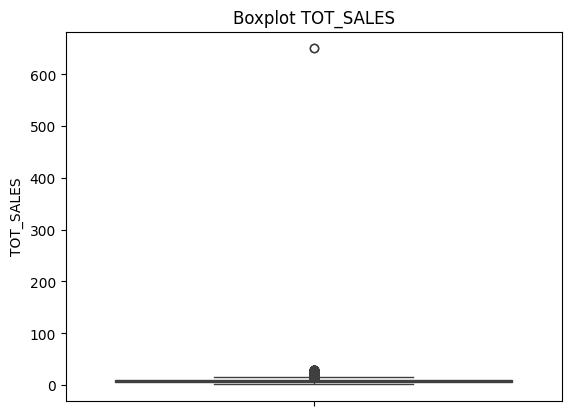

In [ ]:
sns.boxplot(df_transaction['TOT_SALES'])
plt.title('Boxplot TOT_SALES')
plt.show()

In [ ]:
# cek outlier
outliers = df_transaction[df_transaction['TOT_SALES'] > 100]
outliers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,1970-01-01 00:00:00.000043331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,1970-01-01 00:00:00.000043605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [ ]:
outliers_2 = df_transaction[df_transaction['PROD_QTY'] > 50]
outliers_2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,1970-01-01 00:00:00.000043331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,1970-01-01 00:00:00.000043605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [ ]:
# Menghitung batas IQR pada kolom TOT_SALES
Q1_sales = df_transaction['TOT_SALES'].quantile(0.25)
Q3_sales = df_transaction['TOT_SALES'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales

lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

In [ ]:
# Menghitung batas IQR kolom PROD_QTY
Q1_qty = df_transaction['PROD_QTY'].quantile(0.25)
Q3_qty = df_transaction['PROD_QTY'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty

lower_bound_qty = Q1_qty - 1.5 * IQR_qty
upper_bound_qty = Q3_qty + 1.5 * IQR_qty

In [ ]:
df_transaction_clean = df_transaction[
    (df_transaction['TOT_SALES'] >= lower_bound_sales) & (df_transaction['TOT_SALES'] <= upper_bound_sales)
    & (df_transaction['PROD_QTY'] >= lower_bound_qty) & (df_transaction['PROD_QTY'] <= upper_bound_qty)]

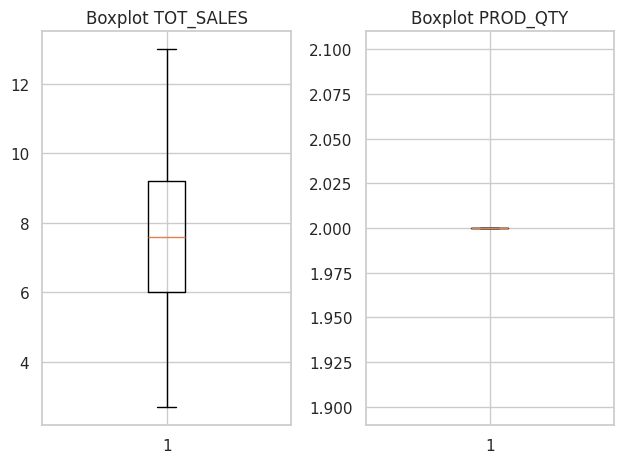

In [ ]:
# Visulisasi using boxplot
plt.subplot(1, 2, 1)
plt.boxplot(df_transaction_clean['TOT_SALES'])
plt.title('Boxplot TOT_SALES')

plt.subplot(1, 2, 2)
plt.boxplot(df_transaction_clean['PROD_QTY'])
plt.title('Boxplot PROD_QTY')

plt.tight_layout()
plt.show()

In [ ]:
# check missing value and duplicated
duplicated = df_transaction_clean.duplicated().sum().sum()
missing_value = df_transaction_clean.isnull().sum().sum()
print(f"duplicated:{duplicated}")
print(f"missing value:{missing_value}")

duplicated:1
missing value:0


In [ ]:
# Handle duplicated data dan missing value
df_transaction_clean = df_transaction_clean.drop_duplicates()
df_transaction_clean = df_transaction_clean.dropna()
print(f"duplicated:{df_transaction_clean.duplicated().sum().sum()}")
print(f"missing value:{df_transaction_clean.isnull().sum().sum()}")

duplicated:0
missing value:0


In [ ]:
df_transaction_clean.shape

(236038, 8)

In [ ]:
df_transaction_clean.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,236038,236038.000000,2.360380e+05,2.360380e+05,236038.000000,236038.0,236038.000000
mean,1970-01-01 00:00:00.000043463,135.217016,1.356217e+05,1.353047e+05,56.553462,2.0,7.675752
min,1970-01-01 00:00:00.000043282,1.000000,1.000000e+03,1.000000e+00,1.000000,2.0,2.700000
25%,1970-01-01 00:00:00.000043376,70.000000,7.009200e+04,6.801925e+04,28.000000,2.0,6.000000
50%,1970-01-01 00:00:00.000043464,130.000000,1.301860e+05,1.344140e+05,56.000000,2.0,7.600000
75%,1970-01-01 00:00:00.000043552,203.000000,2.031780e+05,2.030148e+05,85.000000,2.0,9.200000
max,1970-01-01 00:00:00.000043646,272.000000,2.373711e+06,2.415841e+06,114.000000,2.0,13.000000
std,NaN,76.239827,7.923851e+04,7.763409e+04,32.821592,0.0,2.215836


In [ ]:
df_transaction_clean.describe(include='object')

,PROD_NAME
count,236038
unique,114
top,Kettle Mozzarella Basil & Pesto 175g
freq,3004


# **Data Behaviour**

In [ ]:
df_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
df_behavior.shape

(72637, 3)

In [ ]:
df_behavior.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
df_behavior.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


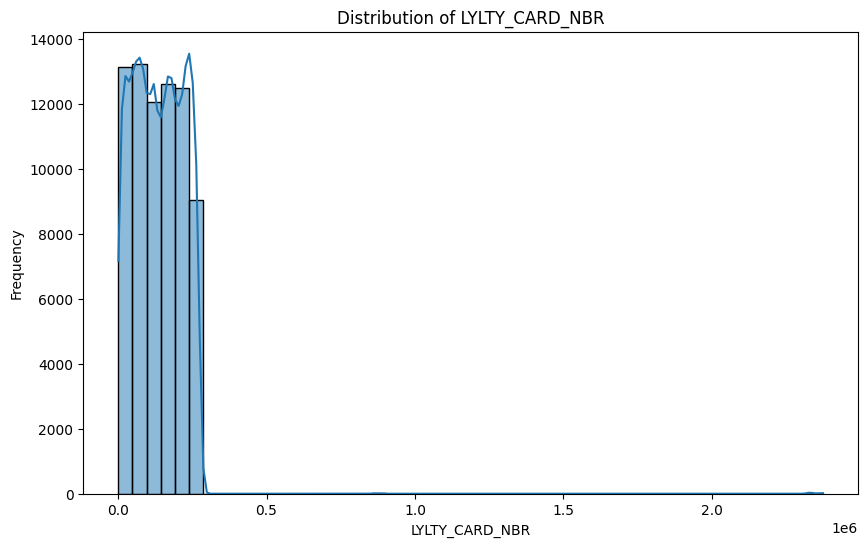

In [ ]:
# Visualisasi distribusi data
plt.figure(figsize=(10,6))
sns.histplot(df_behavior['LYLTY_CARD_NBR'], bins=50, edgecolor='black', kde=True)
plt.title('Distribution of LYLTY_CARD_NBR')
plt.xlabel('LYLTY_CARD_NBR')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df_behavior.describe(include='object')

,LIFESTAGE,PREMIUM_CUSTOMER
count,72637,72637
unique,7,3
top,RETIREES,Mainstream
freq,14805,29245


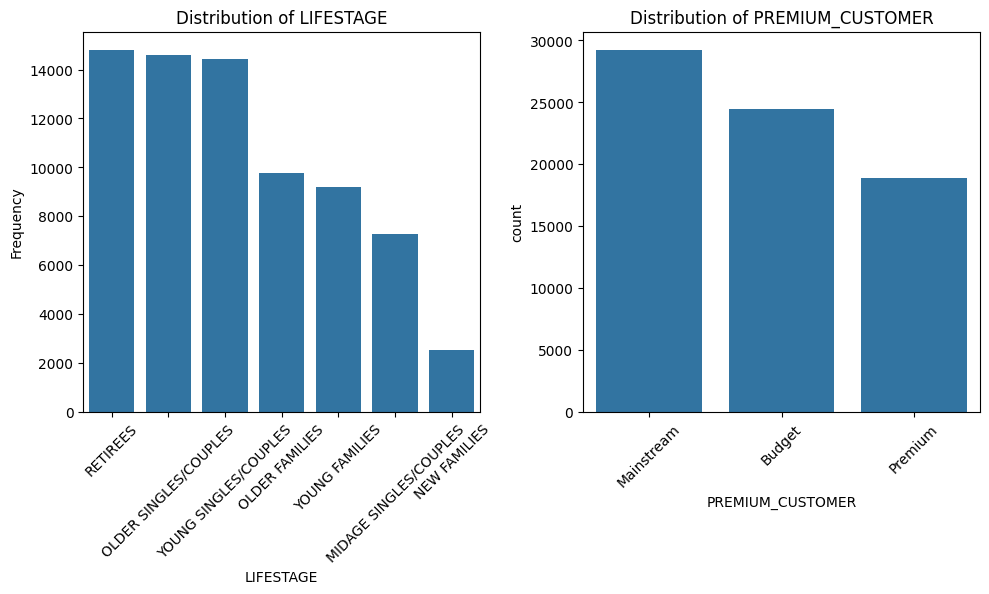

In [ ]:
# visulisasi untuk type data kategori
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(data=df_behavior, x='LIFESTAGE', order=df_behavior['LIFESTAGE'].value_counts().index)
plt.title('Distribution of LIFESTAGE')
plt.xlabel('LIFESTAGE')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.countplot(data=df_behavior, x='PREMIUM_CUSTOMER', order=df_behavior['PREMIUM_CUSTOMER'].value_counts().index)
plt.title('Distribution of PREMIUM_CUSTOMER')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
missing_value_behavior = df_behavior.isnull().sum().sum()
print(f"missing value:{missing_value_behavior}")

duplicated_behavior = df_behavior.duplicated().sum().sum()
print(f"duplicated:{duplicated_behavior}")

missing value:0
duplicated:0


In [ ]:
# Menggabungkan dua dataset
df = pd.merge(df_transaction_clean, df_behavior, on='LYLTY_CARD_NBR')

In [ ]:
df.shape

(236038, 10)

In [ ]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,month,year,LIFESTAGE,PREMIUM_CUSTOMER
0,1970-01-01,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,1,1970,YOUNG SINGLES/COUPLES,Premium
1,1970-01-01,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1,1970,MIDAGE SINGLES/COUPLES,Budget
2,1970-01-01,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,1,1970,MIDAGE SINGLES/COUPLES,Budget
3,1970-01-01,9,9208,8634,15,Twisties Cheese 270g,2,9.2,1,1970,MIDAGE SINGLES/COUPLES,Budget
4,1970-01-01,38,38142,34181,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2,1,1970,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
df.describe(include='object')

,PROD_NAME,LIFESTAGE,PREMIUM_CUSTOMER,dey_week
count,236038,236038,236038,236038
unique,114,7,3,1
top,Kettle Mozzarella Basil & Pesto 175g,OLDER SINGLES/COUPLES,Mainstream,Thursday
freq,3004,48973,90563,236038


# **Exploratory data analisis**

# 1. Analisis tren total penjulan

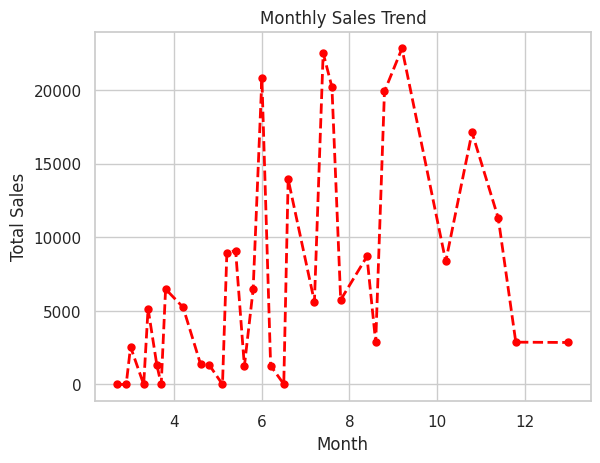

In [ ]:
monthly_sales = df.groupby(df['TOT_SALES'])['month'].sum()
monthly_sales.plot(kind='line', marker='o', color='red', linestyle='dashed', markersize=5, linewidth=2)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.show()

**Interperetasi hasil\:**
Secara keseluruhan trand total penjualan mengalami kenaikan pada priode tahun pertama sampai pertengahan tahun, Sedangkan untuk akhir tahun trend menunjukan penurunan rentang dari bulan 10 - 12, mungkin untuk faktot penurunan secara siginifikan di pengaruhi oleh kompanye penjualan atau perubahan musim.


- Dari bulan 1-7 terlihat trend penjualan mengalami peningkatan.
- dari bulan 7 - 12 trend cenderung mengalami penurunan
- Pada bulan 5 - 6 trend mengalami keanikan dan bulan 8 - 9, diikuti dengan trend penurunan yang cepat.
- Puncak total penjualan pada bulan 6 - 9 kisaran antara 15.000 hingga lebih dari 20.000, Puncak tertinggi pada bulan 7 atau 8 mungkin menandakan adanya priode aktivitas penjualan yang mungkin mempengaruhi penjualan secara drastis pada priode tersebut.
- Penurunan terjadi pada bulan 9 - 12 terlihat trend tidak stabil cenderung trun, pada bulan ke 12 trend mengalami penurunan pada titik terendah. mungkin hal tersebut disebabkan oleh faktor musiman atau kondisi pasar pada akhir tahun.

# 2.Analisis Berdasarkan segmentasi pelanggan

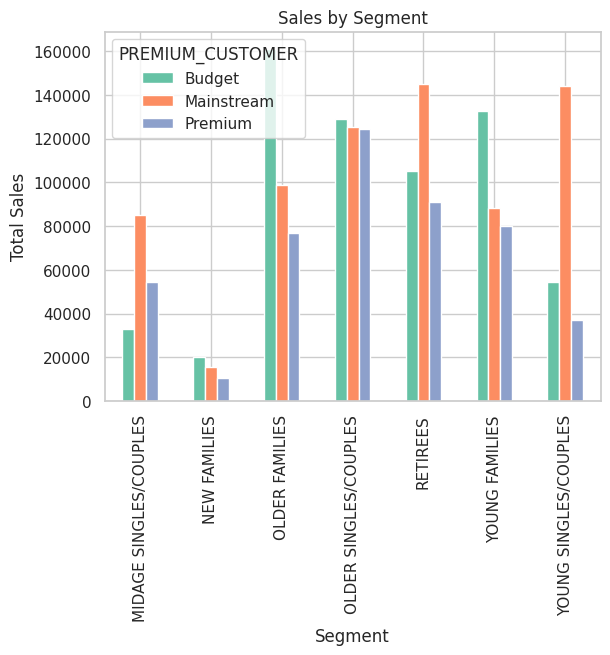

In [ ]:
sns.set(style="whitegrid")
segment_sales = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack()
segment_sales.plot(kind='bar', color=sns.color_palette("Set2"))
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.title('Sales by Segment')
plt.show()

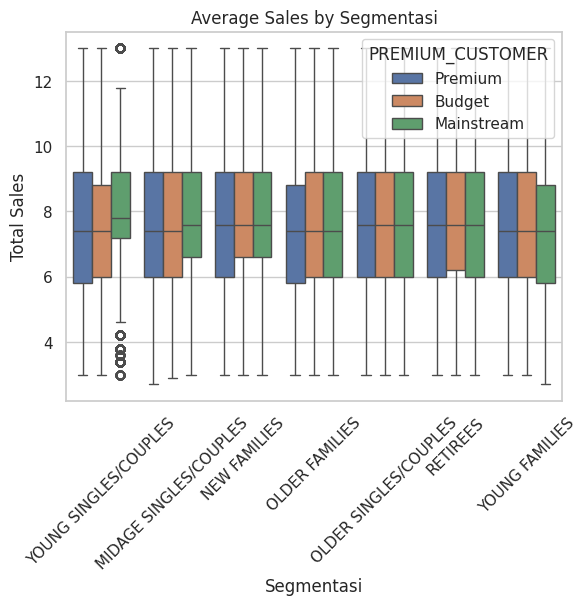

In [ ]:
avg_sales_per_segmentasi = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean()
sns.boxplot(data=df, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Average Sales by Segmentasi')
plt.xlabel('Segmentasi')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

**Interpetasi dari visualisasi:**\
terlihat bahwa menunjukan pola belanja yang serupa di setiap segemnya berdasarkan kategori PREMIUM_CUSTOMER. pada pelanggan Budget MIDAGE SINGLES/COUPLES melakukan aktivitas belanja cenderung jika dibandingkan dengan Premium dan Mainstream. Selain itu pada YOUNG SINGLES/COUPLES memiliki variansi belanja yang lebih besar dengan beberapa pelanggan yang berbelanja dalam jumlah yang sangat kecil\.
- Dalam segmentasi pelanggan YOUNG SINGLES/COUPLES memiliki beberapa variasi dalam TOT_SALES dengan beberapa outlier yaitu 4 di bawah, itu artinya sejumlah pelanggan membeli produk dengan harga TOT_SALES yang lebih rendah daripada mayoritas lain\.

- Segmen seperti OLDER FAMILIES, RETIREES, dan OLDER SINGLES/COUPLES memiliki rentang penjualan yang lebih sempit dan outliers lebih sedikit, menunjukkan nilai penjualan yang lebih seragam.

- pada MIDAGE SINGLES/COUPLES kategori pelanggan Mainstream itu cenderung lebih rendah dibandingkan dengan Budget dan Premium.


# 3. Analisis Penjualan product


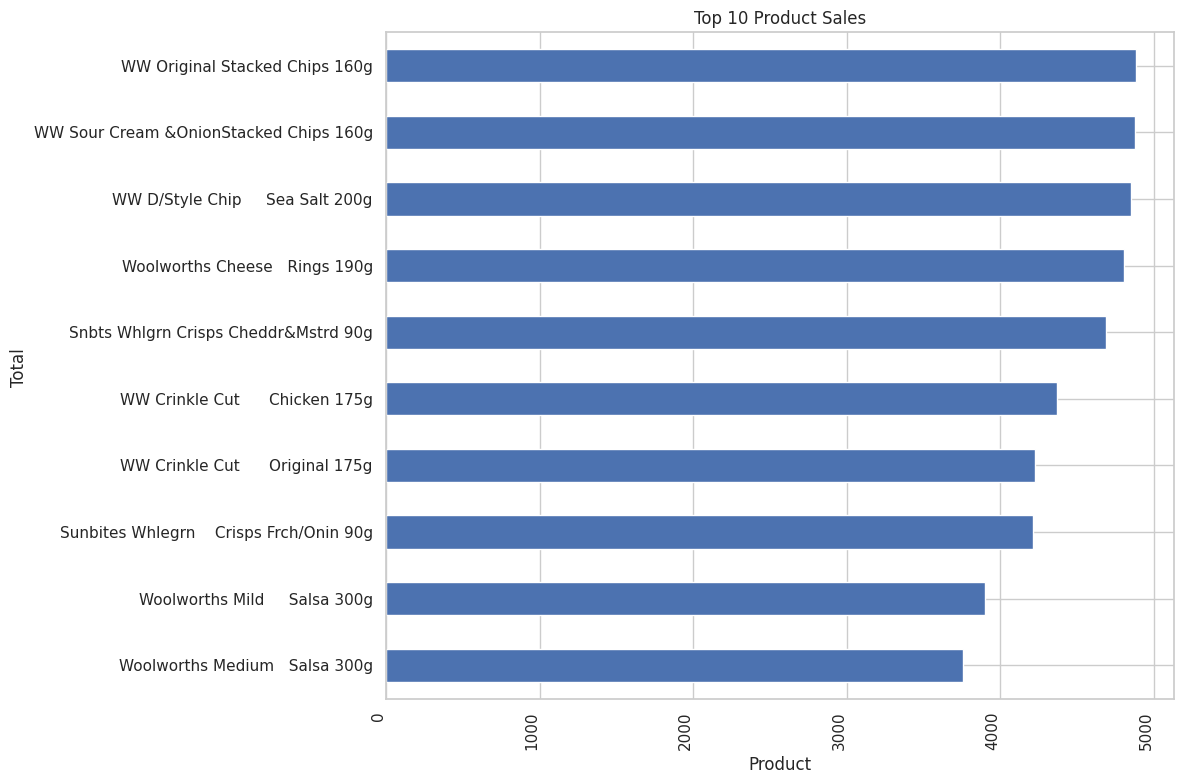

In [ ]:
quantity_product = df.groupby(['PROD_NAME'])['TOT_SALES'].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 8))
quantity_product.head(10).plot(kind='barh')
plt.xlabel('Product')
plt.ylabel('Total ')
plt.title('Top 10 Product Sales')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

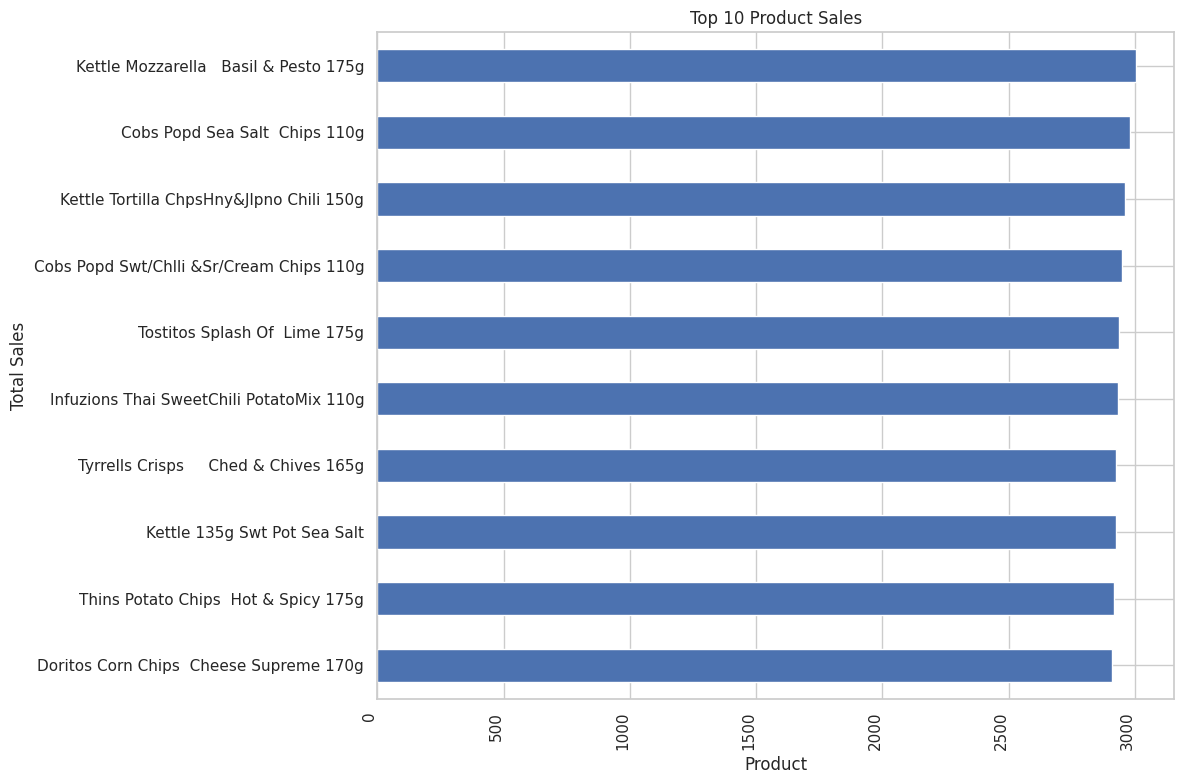

In [ ]:
top_product = df['PROD_NAME'].value_counts().head(10).sort_values(ascending=True)

plt.figure(figsize=(12, 8))
top_product.plot(kind='barh')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Top 10 Product Sales')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

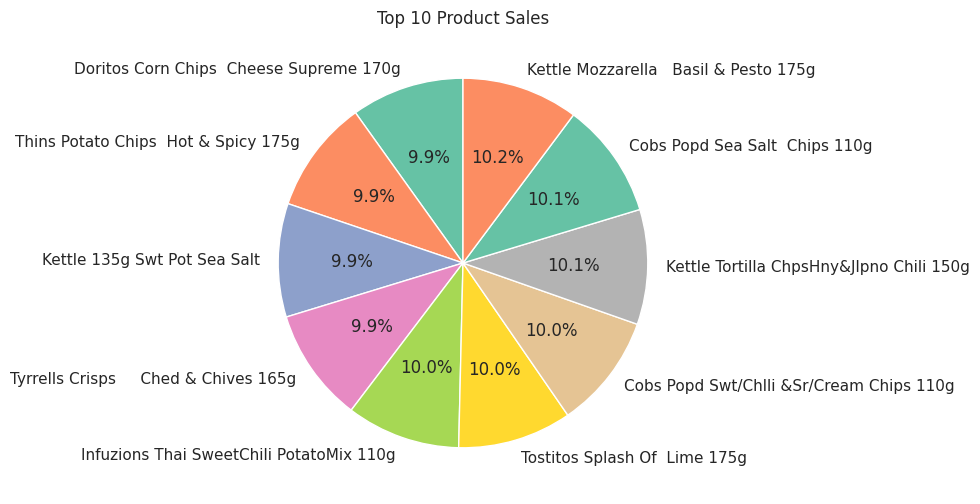

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
top_product.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Top 10 Product Sales')
plt.ylabel('')
plt.show()